In [20]:
import numpy as np
import itertools as it

m, n = 64, 64

def sample_mask_bernoulli(p):
    return np.random.random((m, n)) < p

shape = "sphere"
norm = dict(rectangle=np.inf, diamond=1, sphere=2)[shape]

def sample_mask_chunked(p, k):
    didjs = [didj for didj in it.product(range(-k, k + 1), repeat=2)
             if np.linalg.norm(didj, ord=norm) < k]

    area = len(didjs)
    mask = sample_mask_bernoulli(p ** (1./area))

    return np.prod([np.roll(mask, (di, dj), (0, 1)) for di, dj in didjs], axis=0)


In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_masks(sample_mask):
    k = 2
    fig, axes = plt.subplots(1, k)
    masks = [sample_mask() for _ in range(k)]
    print np.mean(masks)
    for ax, mask in zip(axes, masks):
        ax.imshow(mask, interpolation="nearest", cmap="bone")

0.496826171875


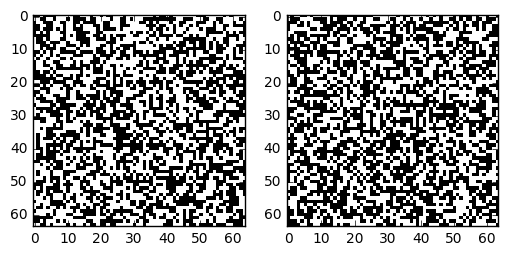

In [22]:
plot_masks(lambda: sample_mask_chunked(0.5, 1))

0.48779296875


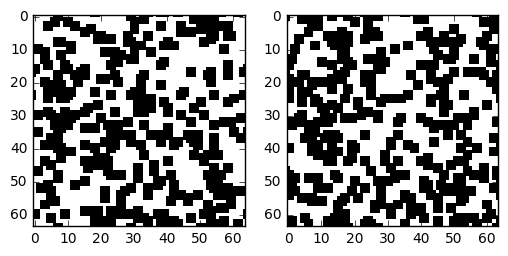

In [33]:
plot_masks(lambda: sample_mask_chunked(0.5, 2))

0.527954101562


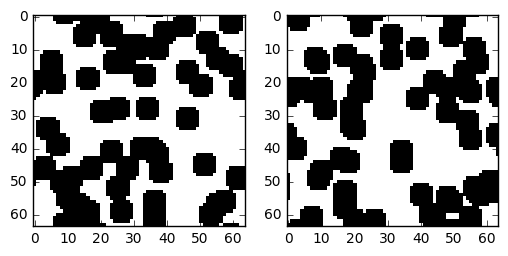

In [34]:
plot_masks(lambda: sample_mask_chunked(0.5, 4))

0.43505859375


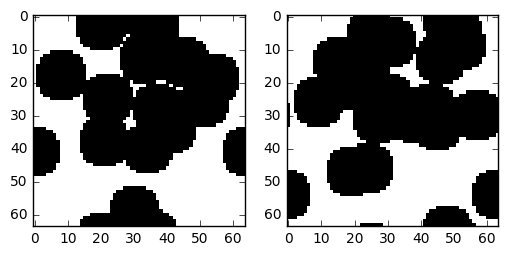

In [35]:
plot_masks(lambda: sample_mask_chunked(0.5, 8))

0.46484375


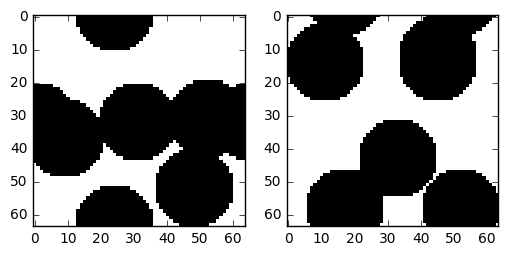

In [37]:
plot_masks(lambda: sample_mask_chunked(0.5, 12))